In [7]:
import os

import numpy as np

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

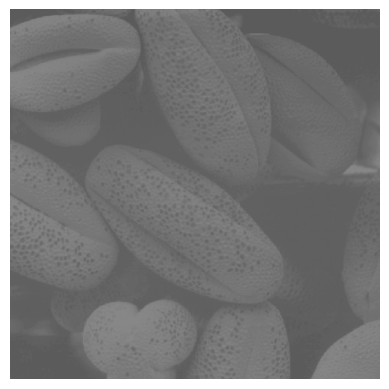

In [8]:
img = Image.open("../../DIP3E_Original_Images_CH03/Fig0310(b)(washed_out_pollen_image).tif")
img = np.asarray(img)

plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off');

In [9]:
def contrast_stretching_function_vectorized(img, new_min, new_max):
    r_1, s_1 = img.min(), new_min
    r_2, s_2 = img.max(), new_max

    assert r_2 - r_1 < new_max - new_min
    

    result = np.piecewise(img, [img < r_1, (img >= r_1) & (img < r_2), img >= r_2],
                         [lambda x: s_1 / r_1 * x,
                          lambda x: (s_2 - s_1) / (r_2 - r_1) * (x - r_1) + s_1,
                          lambda x: (255 - s_2) / (255 - r_2) * (x - r_2) + s_2])

    return result

img = Image.open("../../DIP3E_Original_Images_CH03/Fig0310(b)(washed_out_pollen_image).tif")
img = np.asarray(img)
img_contrast_stretched = contrast_stretching_function_vectorized(img, 30, 220)

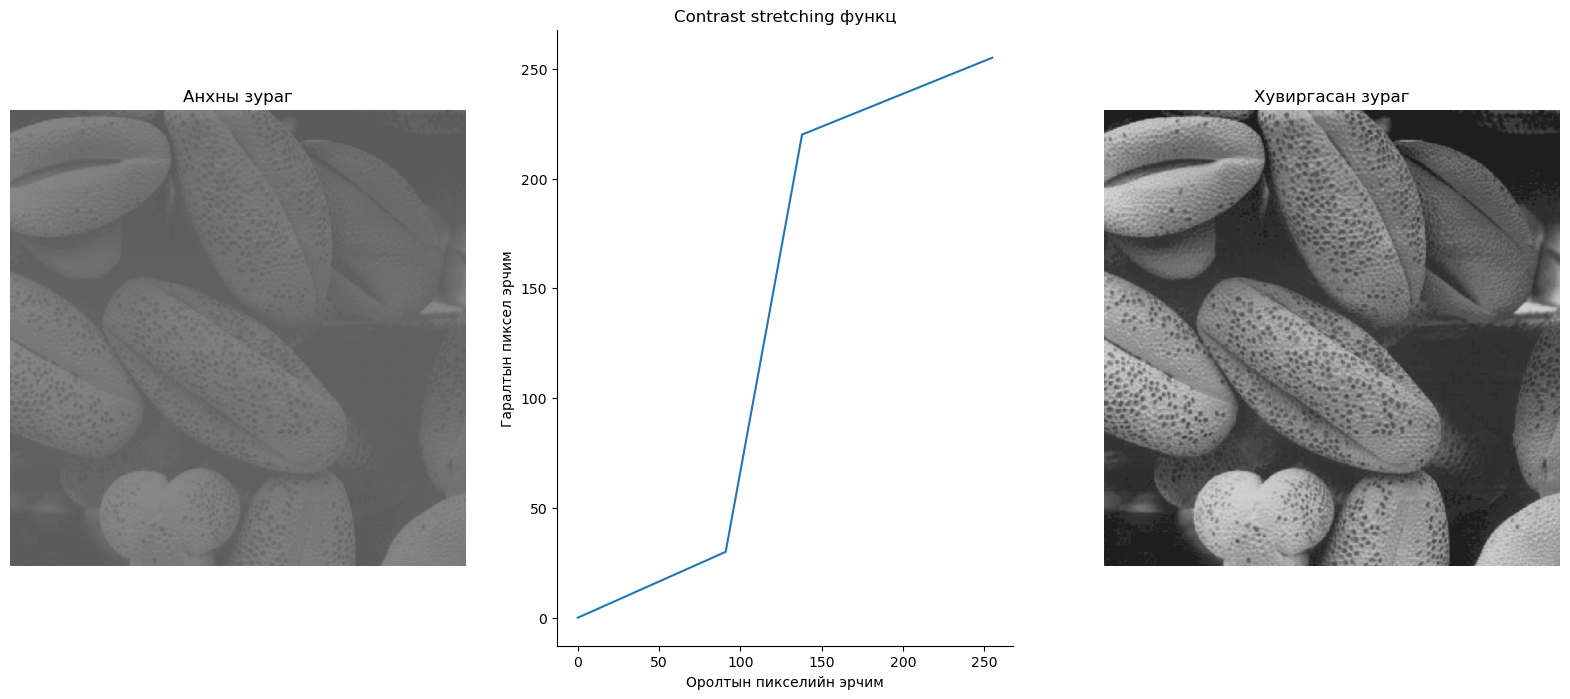

In [10]:
def contrast_stretching_function(pixel_value, img_min, img_max, new_min, new_max):
    (r_1, s_1) = (img_min, new_min)
    (r_2, s_2) = (img_max, new_max)

    assert r_2 - r_1 < new_max - new_min

    if pixel_value < r_1:
        return s_1/r_1*pixel_value
    elif (pixel_value >= r_1) and (pixel_value < r_2):
        return (s_2-s_1)/(r_2-r_1)*(pixel_value-r_1) + s_1
    elif r_2 <= pixel_value:
        return (255-s_2)/(255-r_2)*(pixel_value-r_2) + s_2

img_min, img_max = img.min(), img.max()
new_min, new_max = 30, 220

x_values = np.arange(256)
y_values = [contrast_stretching_function(x, img_min, img_max, new_min, new_max) for x in x_values]

fig, axes = plt.subplots(1, 3, figsize = (20, 8))

axes[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
axes[0].set_title("Анхны зураг")
axes[0].axis('off')

axes[2].imshow(img_contrast_stretched, cmap = 'gray', vmin = 0, vmax = 255)
axes[2].set_title("Хувиргасан зураг")
axes[2].axis('off')

axes[1].plot(x_values, y_values)
axes[1].set_title("Contrast stretching функц")
axes[1].set_xlabel("Оролтын пикселийн эрчим")
axes[1].set_ylabel("Гаралтын пиксел эрчим")

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

fig.savefig("contrast_stretching_1.png", dpi = 300)

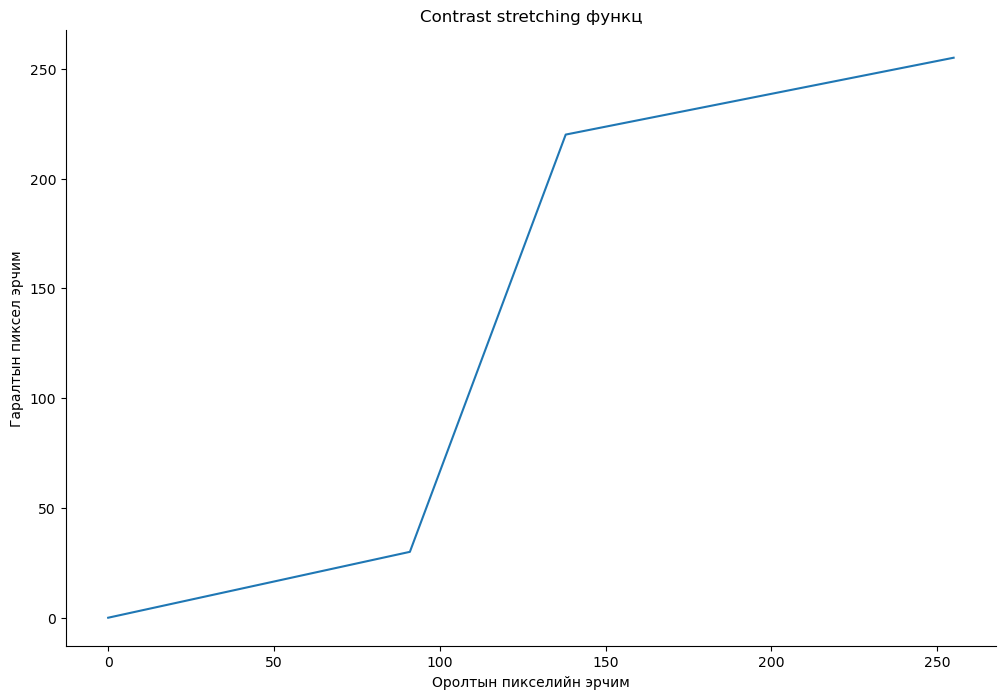

In [13]:
img_min, img_max = img.min(), img.max()
new_min, new_max = 30, 220

x_values = np.arange(256)
y_values = [contrast_stretching_function(x, img_min, img_max, new_min, new_max) for x in x_values]

fig, axes = plt.subplots(figsize = (12, 8))

axes.plot(x_values, y_values)
axes.set_title("Contrast stretching функц")
axes.set_xlabel("Оролтын пикселийн эрчим")
axes.set_ylabel("Гаралтын пиксел эрчим")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.savefig("contrast_stretching_func_1.png", dpi = 300)

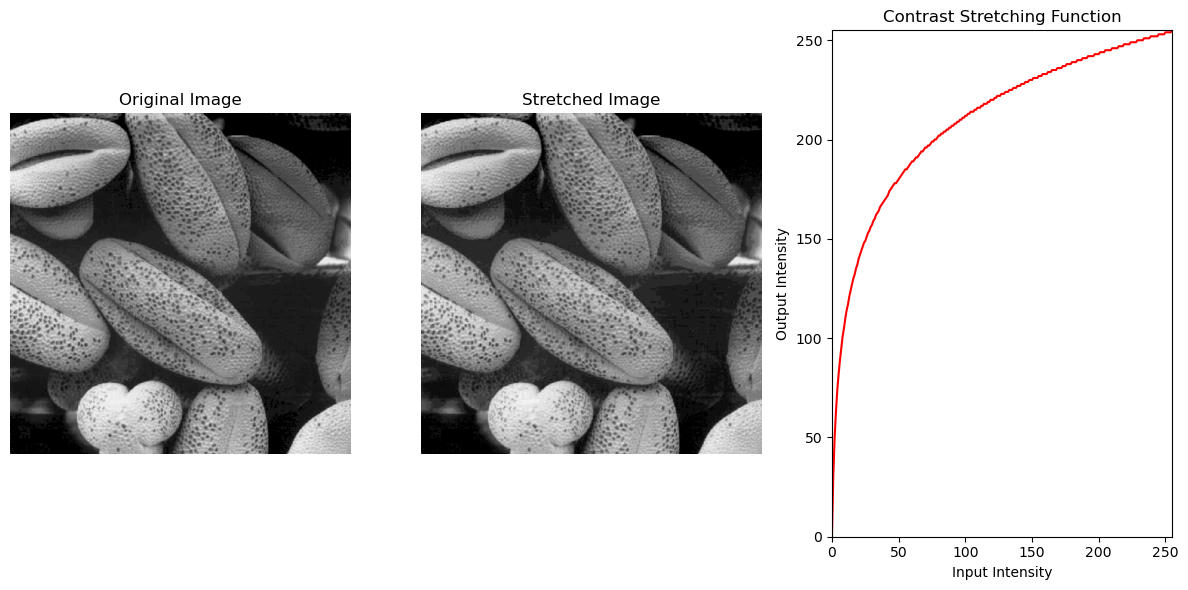

In [6]:
img = Image.open("../../DIP3E_Original_Images_CH03/Fig0310(b)(washed_out_pollen_image).tif")
img = np.asarray(img)

c = 255 / np.log(256)  # Scaling factor
log_transformed_img = (c * np.log(img + 1)).astype(np.uint8)

# Create an intensity mapping function for visualization
def log_transformed(pixel_value):
    return (c * np.log(pixel_value + 1)).astype(np.uint8)

# Generate the x and y values for the contrast stretching function
x_values = np.arange(256)  # Intensity values from 0 to 255
y_values = [log_transformed(x) for x in x_values]

# Plot the original and stretched images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
img = Image.open("../../DIP3E_Original_Images_CH03/Fig0310(b)(washed_out_pollen_image).tif")
img = np.asarray(img)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log_transformed_img, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')

# Plot the contrast stretching function
plt.subplot(1, 3, 3)
plt.plot(x_values, y_values, color='red')
plt.title('Contrast Stretching Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.tight_layout()
plt.show()


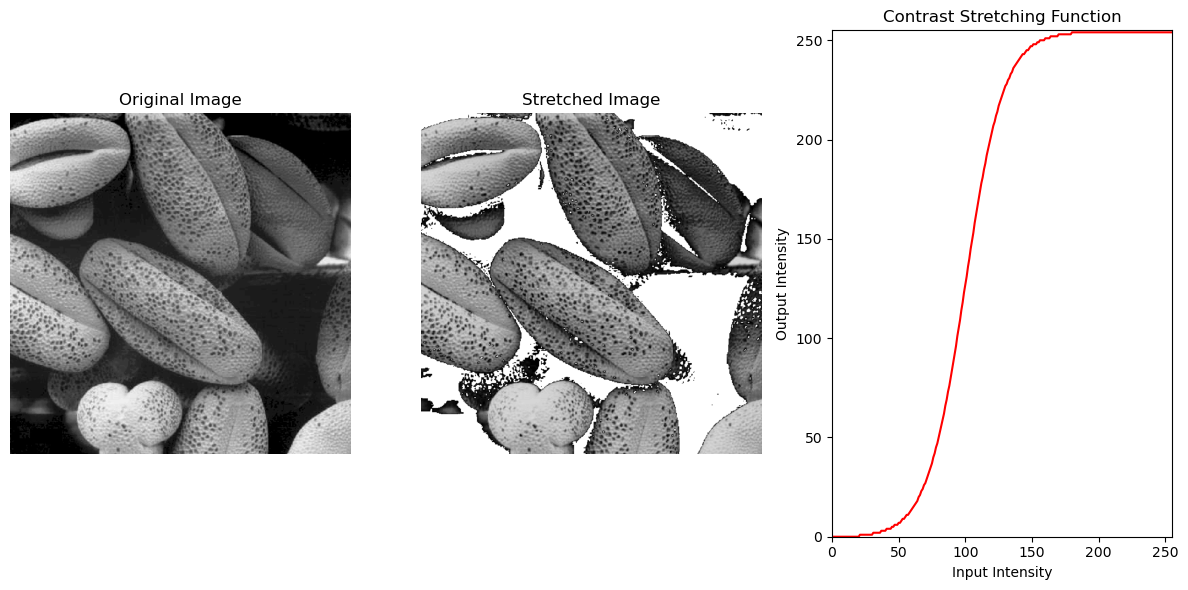

In [ ]:
img = Image.open("../../DIP3E_Original_Images_CH03/Fig0310(b)(washed_out_pollen_image).tif")
img = np.asarray(img)

alpha = 0.07  # Contrast control (adjust as needed)
beta = 100  # Brightness control (adjust as needed)
sigmoid_img = (255*(1 / (1 + np.exp(-alpha * (img - beta))))).astype(np.uint8)

# Create an intensity mapping function for visualization
def sigmoid_transformed(pixel_value):
    return (255*(1 / (1 + np.exp(-alpha * (pixel_value - beta))))).astype(np.uint8)

# Generate the x and y values for the contrast stretching function
x_values = np.arange(256)  # Intensity values from 0 to 255
y_values = [sigmoid_transformed(x) for x in x_values]

# Plot the original and stretched images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sigmoid_img, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')

# Plot the contrast stretching function
plt.subplot(1, 3, 3)
plt.plot(x_values, y_values, color='red')
plt.title('Contrast Stretching Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.tight_layout()
plt.show()
